In [9]:
from PIL import Image
import numpy as np
import torch

model = torch.load("C:/Users/pytho/Downloads/brain_tumour_entire_model.pth")
model.eval() 

def load_and_resize_image(image_path, target_size=(256, 256)):
    # Open the image file
    image = Image.open(image_path)
    
    # Resize the image to the target size
    image = image.resize(target_size)
    
    # Convert the image to a numpy array and normalize it
    image_array = np.array(image) / 255.0
    
    # Ensure image has 3 channels (RGB)
    if len(image_array.shape) == 2:  # If grayscale, convert to RGB
        image_array = np.stack((image_array,) * 3, axis=-1)
    
    # Add batch dimension to match the model input shape
    image_array = np.expand_dims(image_array.transpose(2, 0, 1), axis=0)  # Transpose to match (1, 3, 256, 256)
    
    return image_array

# Example usage
image_path = "C:/Users/pytho/Downloads/TCGA_CS_4941_19960909_14.tif"
resized_image = load_and_resize_image(image_path)

In [10]:
resized_image.shape

(1, 3, 256, 256)

In [11]:
x_tensor = torch.from_numpy(resized_image)
x= x_tensor.to('cuda')
x = x.float()
prediction = model.predict(x)
prediction = torch.where(prediction > 0.5, 1, 0)
prediction1 = prediction.to('cpu')[0][0]

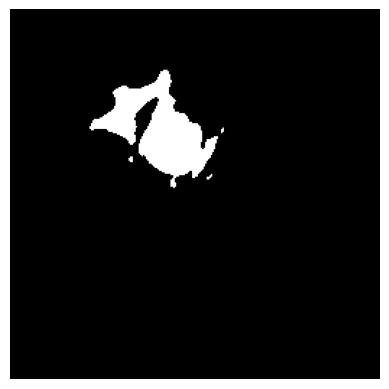

In [12]:
import matplotlib.pyplot as plt

# Assuming mask_tensor is the tensor you provided
mask_array = prediction1.cpu().numpy()  # Convert tensor to NumPy array

# Display the image using Matplotlib
plt.imshow(mask_array, cmap='gray')  # Use 'gray' colormap for binary images
plt.axis('off')  # Turn off axis
plt.show()